In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (30, 10)

In [2]:
df = pd.read_csv(r'C:/Users/Jinyoung/Pictures/python_analysis/fc_preprocessing/rawdata/part1/판매실적통합본.csv', engine='python')

In [3]:
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [4]:
df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
grouped_df = df.groupby(['분기', '대리점'], as_index=False)['수량'].sum()
grouped_df

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


### pyplot을 이용한 그래프 그리기

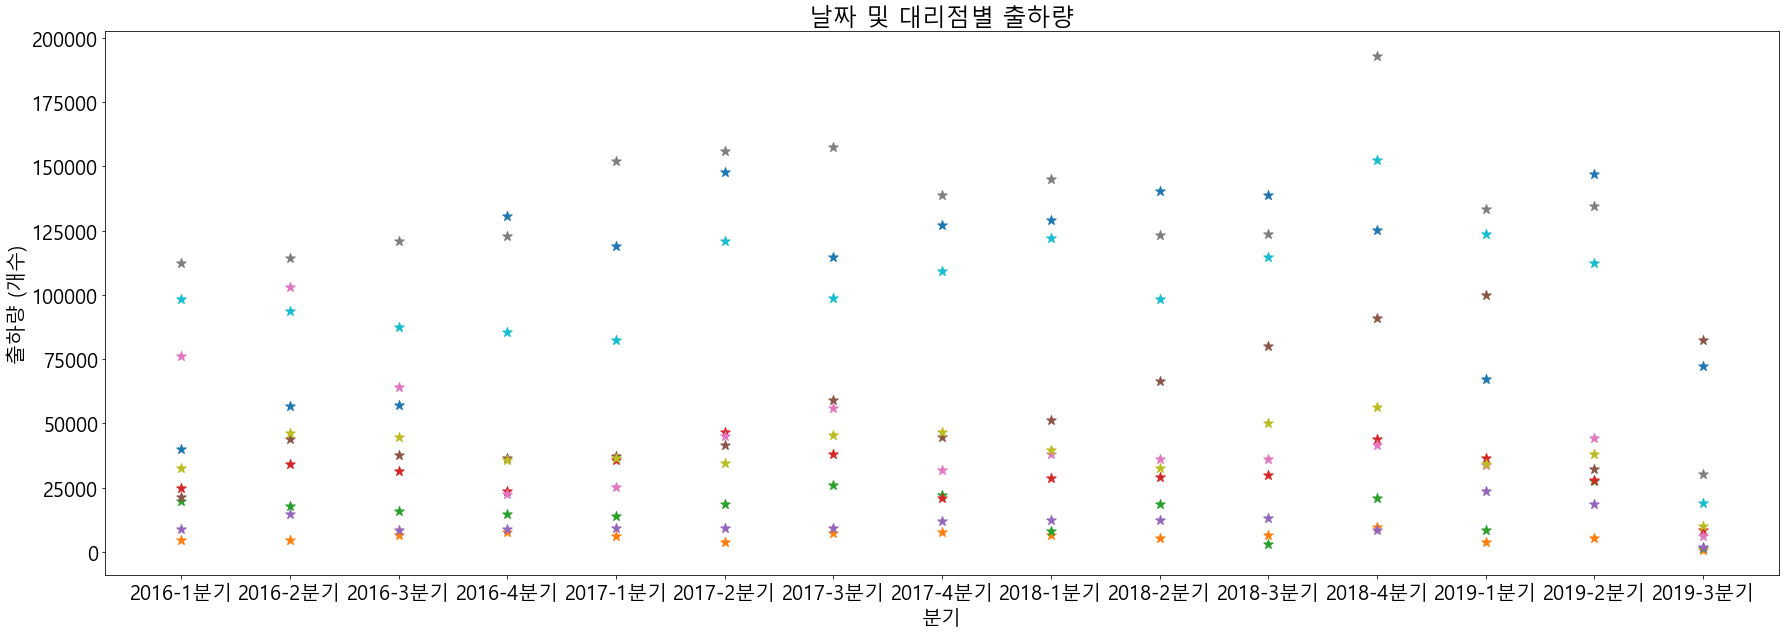

In [7]:
plt.title('날짜 및 대리점별 출하량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)

for agent in grouped_df['대리점'].unique():
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 100, marker = '*')
    

### DataFrame을 이용하여 직접 그래프 그리기

In [8]:
pivot_df = pd.pivot_table(data= grouped_df, values='수량', index='분기', columns='대리점', aggfunc='sum')
pivot_df = pivot_df.add_suffix("_출하량") #대리점명이 전부 컬럼으로 표시되기 때문에

In [10]:
pivot_df.head()

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569


In [11]:
pivot_df['분기'] = list(range(len(pivot_df))) # x축에 쓰기 위해 임의의 변수를 생성

In [13]:
pivot_df.head()

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량,분기
분기,,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266,0
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726,1
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417,2
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516,3
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569,4


([<matplotlib.axis.XTick at 0x1eed87f82e0>,
 [Text(0, 0, '2016-1분기'),
  Text(1, 0, '2016-2분기'),
  Text(2, 0, '2016-3분기'),
  Text(3, 0, '2016-4분기'),
  Text(4, 0, '2017-1분기'),
  Text(5, 0, '2017-2분기'),
  Text(6, 0, '2017-3분기'),
  Text(7, 0, '2017-4분기'),
  Text(8, 0, '2018-1분기'),
  Text(9, 0, '2018-2분기'),
  Text(10, 0, '2018-3분기'),
  Text(11, 0, '2018-4분기'),
  Text(12, 0, '2019-1분기'),
  Text(13, 0, '2019-2분기'),
  Text(14, 0, '2019-3분기')])

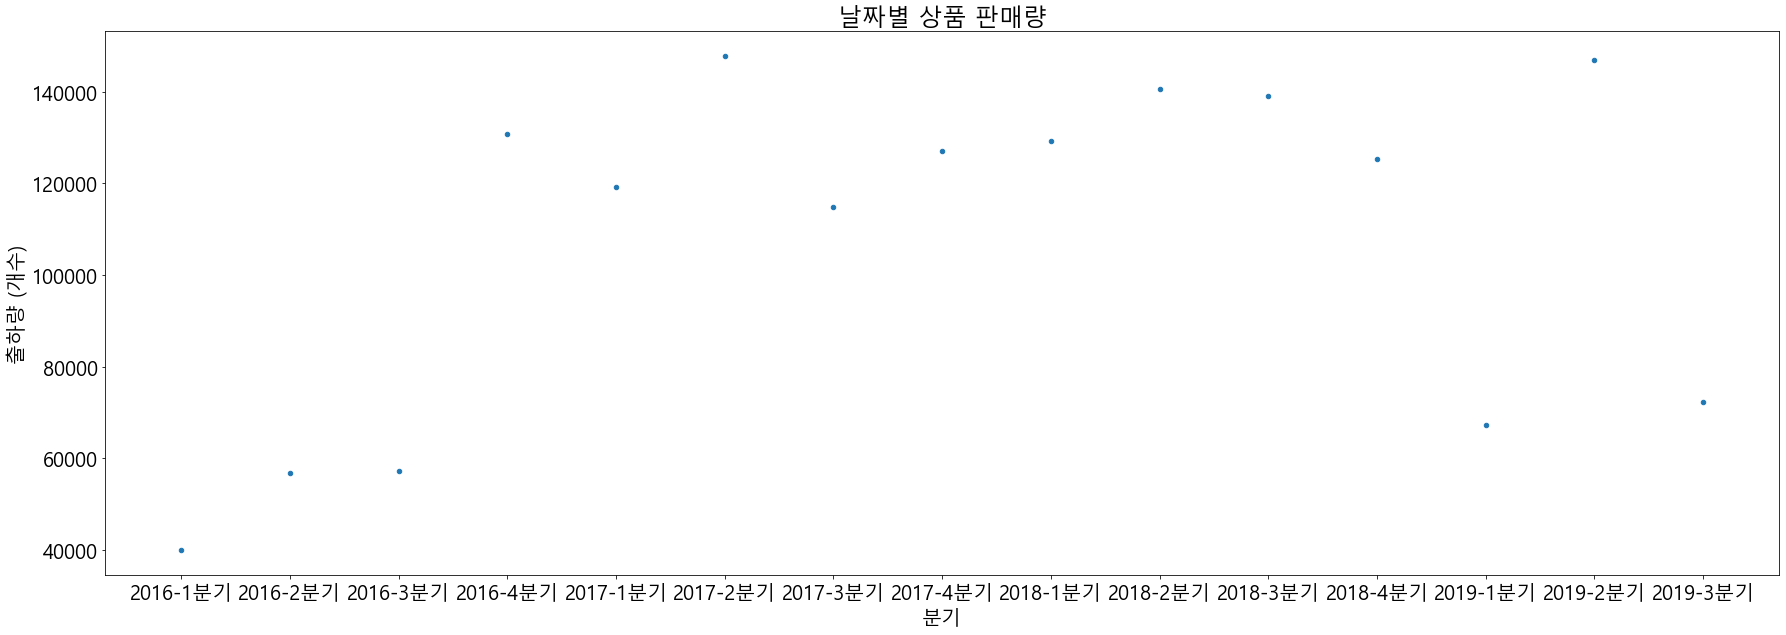

In [14]:
pivot_df.plot(kind='scatter', x='분기', y='대리점 1_출하량')
plt.title('날짜별 상품 판매량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)